In [1]:
!pip install requests beautifulsoup4 pandas textblob wordcloud matplotlib

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [3]:
os.makedirs('data', exist_ok=True)

In [4]:
# Scrape reviews
base_url = "https://www.airlinequality.com/review-pages/skytrax-airline-star-rating-reviews/page/ {}/"
pages_to_scrape = 10
reviews = []

for page_num in range(1, pages_to_scrape + 1):
    url = base_url.format(page_num)
    print(f"Scraping page {page_num}...")

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    for item in soup.find_all("div", {"class": "text_content"}):
        reviews.append(item.get_text(strip=True))

    time.sleep(1)

# Save to CSV
df = pd.DataFrame(reviews, columns=["Review"])
df.to_csv("data/raw_reviews.csv", index=False)

print(f"Scraped {len(reviews)} reviews and saved to data/raw_reviews.csv")

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraped 30 reviews and saved to data/raw_reviews.csv


In [5]:
# Reload CSV
df = pd.read_csv("data/raw_reviews.csv")

# Optional: Clean text
import re
def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9\s.]', '', text)

df['Cleaned_Review'] = df['Review'].apply(clean_text)
df.head()

,Review,Cleaned_Review
0,✅ Trip Verified | Unreliable airline cancelled...,Trip Verified Unreliable airline cancelled f...
1,Not Verified | We flew from Brussels to Tokyo ...,Not Verified We flew from Brussels to Tokyo v...
2,✅ Trip Verified | Terrible experience returnin...,Trip Verified Terrible experience returning ...
3,✅ Trip Verified | Unreliable airline cancelled...,Trip Verified Unreliable airline cancelled f...
4,Not Verified | We flew from Brussels to Tokyo ...,Not Verified We flew from Brussels to Tokyo v...


In [6]:
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)
df[['Cleaned_Review', 'Sentiment']].head()

,Cleaned_Review,Sentiment
0,Trip Verified Unreliable airline cancelled f...,0.250
1,Not Verified We flew from Brussels to Tokyo v...,0.075
2,Trip Verified Terrible experience returning ...,-0.050
3,Trip Verified Unreliable airline cancelled f...,0.250
4,Not Verified We flew from Brussels to Tokyo v...,0.075


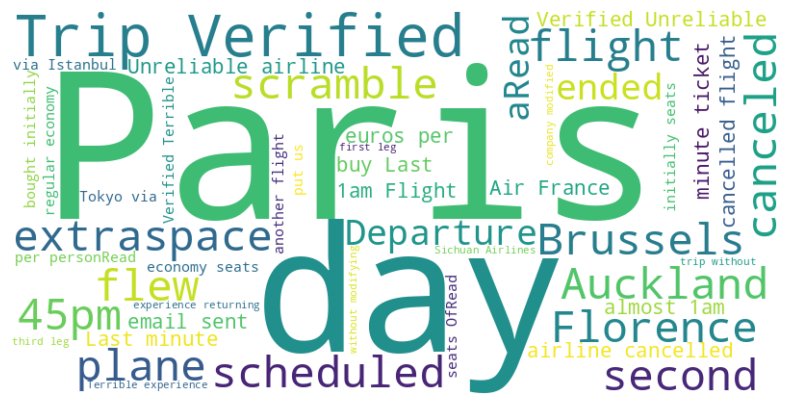

In [7]:
all_reviews = " ".join(review for review in df['Cleaned_Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
from google.colab import files
files.download("data/raw_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

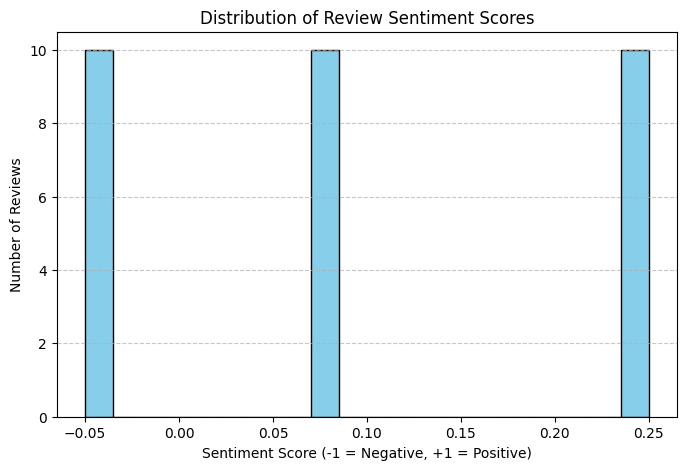

In [9]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
plt.hist(df['Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Sentiment Scores')
plt.xlabel('Sentiment Score (-1 = Negative, +1 = Positive)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

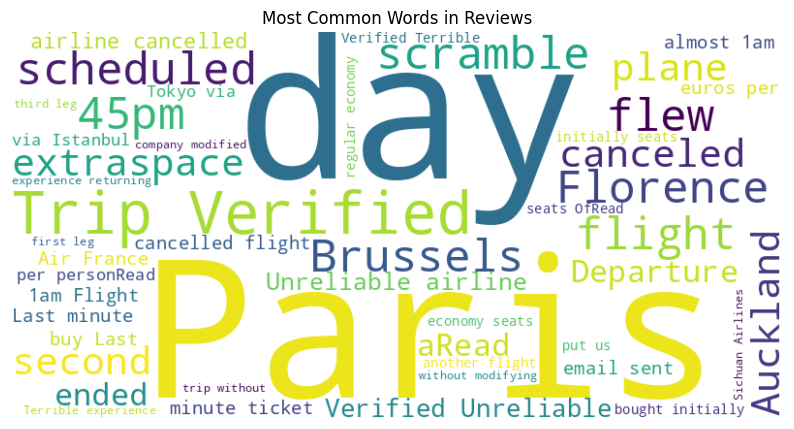

In [10]:
from wordcloud import WordCloud

all_reviews = " ".join(review for review in df['Cleaned_Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

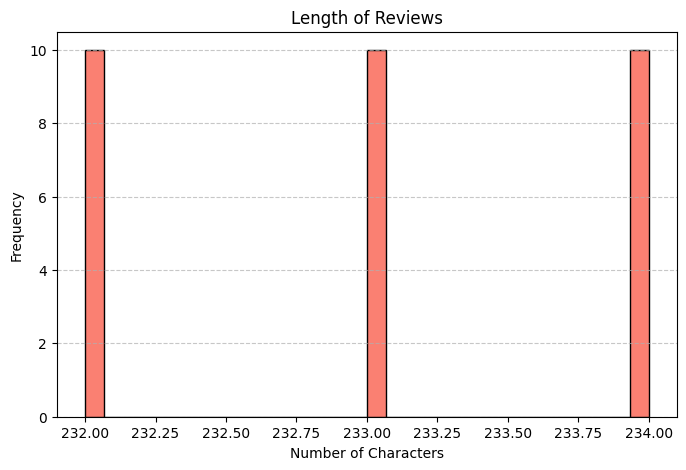

In [11]:
df['Review_Length'] = df['Cleaned_Review'].apply(len)

plt.figure(figsize=(8, 5))
plt.hist(df['Review_Length'], bins=30, color='salmon', edgecolor='black')
plt.title('Length of Reviews')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()